In [1]:
"""A demo geometric construction of the basic control perimeter
of various column-shapes.

The calculation is consistent with EC2 §6.4.2 (1)
"""
from dx_punch.EC2.slab import Slab
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: TkAgg


In [2]:
# Define slab
slab = Slab.new(bx=10., by=10., position='lower-left')

In [3]:
# Set columns
slab.add_column(bx=1., by=1., origin=(5., 5.)) # internal
slab.add_column(bx=1., by=1., origin=(8.5, 4.5), position='lower-left') # edge-x
slab.add_column(bx=1., by=1., origin=(4.5, 8.5), position='lower-left') # edge-y
slab.add_column(bx=1., by=1., origin=(8.5, 8.5), position='lower-left') # corner
slab.add_column(shape='circle', r=.5, center=(1., 1.)) # corner - circular
slab.add_column(shape='circle', r=.5, center=(1., 5.)) # edge-x - circular
slab.add_column(shape='circle', r=.5, center=(5., 1.)) # edge-y - circular
slab.add_column(shape='generic',
                vertices=[(9., 0.), (10., 0.), (10., 1.), (9.5, 1.), (9.5, 0.5), (9., 0.5)]) # corner-generic

In [4]:
# Calculate control perimeters
u1 = []
for c in slab.columns:
    u1.append(c.construct_minimum_perimeter(distance=1.))

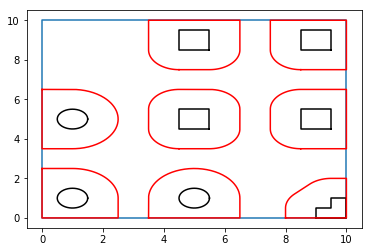

In [5]:
plt.plot(slab.boundary.xy[0], slab.boundary.xy[1])
for i, c in enumerate(slab.columns):
    plt.plot(c.boundary.xy[0], c.boundary.xy[1], 'k')
    plt.plot(u1[i].boundary.xy[0], u1[i].boundary.xy[1], 'r')